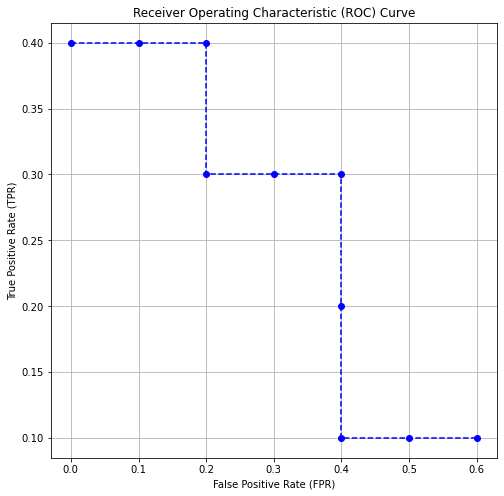

In [1]:
import matplotlib.pyplot as plt

# True Positive Rate (TPR) and False Positive Rate (FPR) for each threshold
thresholds = [0.9, 0.8, 0.75, 0.7, 0.65, 0.6, 0.5, 0.4, 0.3, 0.2]
tpr = [0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1]
fpr = [0.0, 0.1, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.6]

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, marker='o', linestyle='--', color='b')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()

In [2]:
# Provided TPR and FPR values
actual_class = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1]
predicted_probabilities = [0.8, 0.6, 0.7, 0.4, 0.3, 0.2, 0.9, 0.5, 0.65, 0.75]

# Sort the predictions in descending order
sorted_predictions = [p for _, p in sorted(zip(predicted_probabilities, actual_class), reverse=True)]

# Calculate TPR and FPR for different thresholds
thresholds = sorted(set(predicted_probabilities), reverse=True)
tpr_values = []
fpr_values = []

for threshold in thresholds:
    predicted_class = [1 if prob >= threshold else 0 for prob in predicted_probabilities]
    
    true_positives = sum([1 for p, a in zip(predicted_class, actual_class) if p == 1 and a == 1])
    false_positives = sum([1 for p, a in zip(predicted_class, actual_class) if p == 1 and a == 0])
    true_negatives = sum([1 for p, a in zip(predicted_class, actual_class) if p == 0 and a == 0])
    false_negatives = sum([1 for p, a in zip(predicted_class, actual_class) if p == 0 and a == 1])
    
    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)
    
    tpr_values.append(tpr)
    fpr_values.append(fpr)

# Calculate AUC using the trapezoidal rule
auc = sum([tpr * (fpr_values[i+1] - fpr_values[i]) for i, tpr in enumerate(tpr_values[:-1])])

print(f'TPR Values: {tpr_values}')
print(f'FPR Values: {fpr_values}')
print(f'AUC: {auc}')


TPR Values: [0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.8333333333333334, 1.0, 1.0, 1.0]
FPR Values: [0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.5, 0.5, 0.75, 1.0]
AUC: 0.8333333333333333


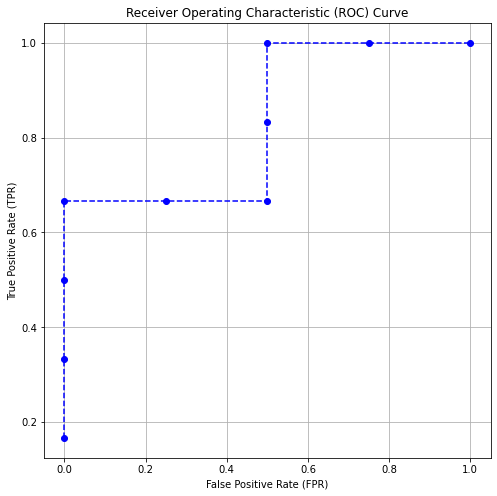

AUC: 0.8333333333333333


In [3]:
import matplotlib.pyplot as plt

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_values, tpr_values, marker='o', linestyle='--', color='b')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()

# Display AUC
print(f'AUC: {auc}')


C:\Users\Pankaj Agarwal\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


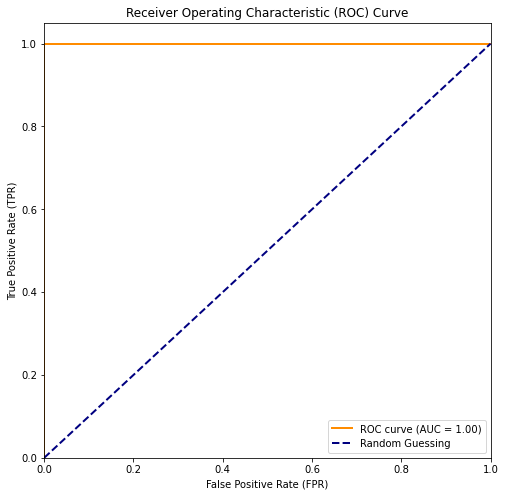

AUC: 1.0


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1)
y = (X > 0.5).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('AUC:', roc_auc)

C:\Users\Pankaj Agarwal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'False Positive Rate (FPR)')

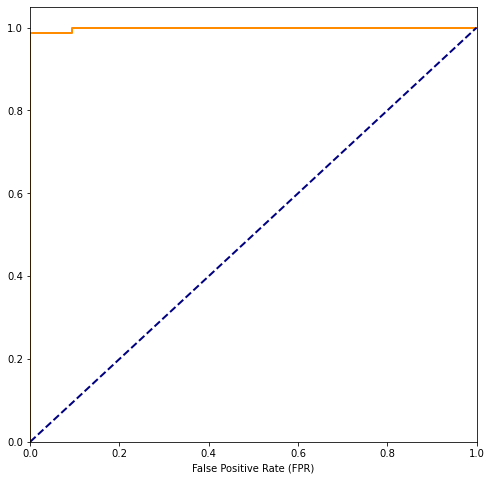

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')


In [4]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [5]:
df = load_breast_cancer(as_frame=True) 
df = df.frame 
  
x = df.drop('target',axis=1) 
y = df[['target']] 
# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
# Train a Random Forest classifier 
rf = RandomForestClassifier(n_estimators=5, max_depth=2) 
rf.fit(X_train, y_train)

C:\Users\Pankaj Agarwal\AppData\Local\Temp\ipykernel_2360\1179604572.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=5)

In [7]:
# Get predicted class probabilities for the test set 
y_pred_prob = rf.predict_proba(X_test)[:, 1] 

In [8]:
# Compute the false positive rate (FPR)  
# and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [9]:
# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_pred_prob) 
roc_auc

0.9731386198547216

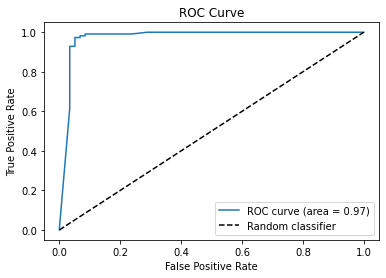

In [10]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

The ROC curve can be used to choose the best threshold for the classifier, depending on the trade-off between TPR and FPR. A threshold closer to 1 will have a lower FPR but a higher TPR, while a threshold closer to 0 will have a higher FPR but a lower TPR.

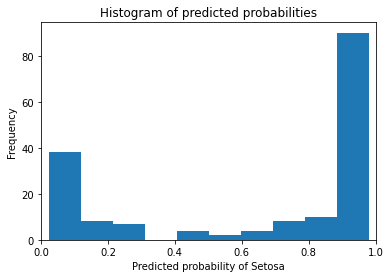

In [11]:
# Plot the predicted class probabilities 
plt.hist(y_pred_prob, bins=10) 
plt.xlim(0, 1) 
plt.title('Histogram of predicted probabilities') 
plt.xlabel('Predicted probability of Setosa') 
plt.ylabel('Frequency') 
plt.show()

# ROC curve for Multi-Class Classifications.

ROC AUC Score : 0.9801308807134893


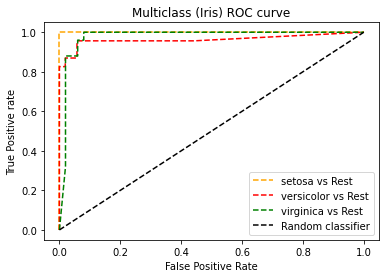

In [12]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.datasets import load_iris 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
  
  
# Load the iris dataset 
iris = load_iris() 
  
# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    test_size=0.5, 
                                                    random_state=23) 
  
# Train a Random Forest classifier 
clf = OneVsRestClassifier(RandomForestClassifier()) 
  
# fit model 
clf.fit(X_train, y_train) 
  
# Get predicted class probabilities for the test set 
y_pred_prob = clf.predict_proba(X_test) 
  
# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr') 
print('ROC AUC Score :',roc_auc) 
  
# roc curve for Multi classes 
colors = ['orange','red','green'] 
for i in range(len(iris.target_names)):     
    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,i], pos_label=i) 
    plt.plot(fpr, tpr, linestyle='--',color=colors[i], label=iris.target_names[i]+' vs Rest') 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.title('Multiclass (Iris) ROC curve') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend() 
plt.show()